In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import random

np.random.seed(1234)
random.seed(1234)

routing_algorithm = ["RoundRobin-LCLB", "RoundRobin-MCLB", "RoundRobin-heuristic_TE"]
cluster_id = [0, 1]

marker_list = ['d', 'o', 'x', 'v', '^', '<', '>', 's', '8', 'p']
color_list = ["orange", "green", "purple", "brown", "cyan", "#C20078", "#FAC205", "gray","#FBDD7E", "#06C2AC", "#FFFF14", "#E6DAA6","olive", "#76FF7B", "pink", "#BC8F6", "#AAA662"]

In [51]:
def get_svc_list(f_):
    df = pd.read_csv(f_)
    svc_list = df["service"].unique()
    return svc_list

def calc_resource_usage(files):
    assert len(routing_algorithm) == len(files)
    df_list = list()
    for i in range(len(routing_algorithm)):
        routing = routing_algorithm[i]
        df = pd.read_csv(files[i])
        df["routing"] = [routing]*len(df) # add new column
        df_list.append(df)
    df = pd.concat(df_list, axis=0)
    df = df.reset_index(drop=True)
    # display(df)
    # print(len(df))
    
    df_usage = pd.DataFrame(columns=["svc", "cluster_id", "routing", "num_replica", "capacity"])
    svc_list = df["service"].unique()
    for cid in cluster_id:
        for routing in routing_algorithm:
            for svc in svc_list:
                temp_df = df[df["routing"] == routing]
                temp_df = temp_df[temp_df["service"] == svc]
                temp_df = temp_df[temp_df["cluster_id"] == cid]
                temp_df = temp_df.reset_index(drop=True)
                capa = 0
                num_repl = 0
                for i in range(len(temp_df)-1):
                    temp_df.loc[i, "timestamp"]
                    duration = (temp_df.loc[i+1, "timestamp"] - temp_df.loc[i, "timestamp"])
                    num_repl += duration * temp_df.loc[i,"num_replica"]
                    capa += duration * temp_df.loc[i,"capacity"]
                df_usage.loc[len(df_usage)] = [svc, cid, routing, num_repl, capa]
    df_usage = df_usage.sort_values(by=["svc", "cluster_id", "routing"])
    df_usage = df_usage.reset_index(drop=True)
    num_repl_norm_list = list()
    capa_norm_list = list()
    for svc in svc_list:
        for cid in cluster_id:
            temp_df = df_usage[df_usage["cluster_id"]==cid]
            temp_df = temp_df[temp_df["svc"]==svc]
            num = len(temp_df)
            temp_df = temp_df[temp_df["routing"]==routing_algorithm[0]]
            lclb_num_repl = float(temp_df["num_replica"])
            lclb_capa = float(temp_df["capacity"])
            for _ in range(num):
                num_repl_norm_list.append(lclb_num_repl)
                capa_norm_list.append(lclb_capa)
    assert len(num_repl_norm_list) == len(df_usage)
    assert len(capa_norm_list) == len(df_usage)
    normalized_num_replica = list()
    normalized_capa= list()
    for i in range(len(df_usage)):
        temp_num_repl = df_usage.loc[i,"num_replica"]/num_repl_norm_list[i]
        temp_capa = df_usage.loc[i,"capacity"]/capa_norm_list[i]
        normalized_num_replica.append(temp_num_repl)
        normalized_capa.append(temp_capa)
    df_usage["norm_num_replica"] = normalized_num_replica
    df_usage["norm_capacity"] = normalized_capa
    display(df_usage)
    return df_usage, df
        

############################################################3
''' Input file '''
# common_path="../simulator/log/sample2-2/three_depth/"
# common_path="../simulator/log/hotos-6d9c26b9/three_depth/"
common_path="../simulator/log/hotos-6d9c26b9-fixed_autoscaler/three_depth/"
############################################################3

files = list()
for routing in routing_algorithm:
    f_ = common_path + routing + "/resource_provisioing_log.csv"
    svc_list = get_svc_list(f_)
    # files[routing] = f_
    files.append(f_)
df_usage, df = calc_resource_usage(files)



,svc,cluster_id,routing,num_replica,capacity,norm_num_replica,norm_capacity
0,A,0,RoundRobin-LCLB,47290000,1.576333e+09,1.000000,1.000000
1,A,0,RoundRobin-MCLB,45520000,1.517333e+09,0.962571,0.962571
2,A,0,RoundRobin-heuristic_TE,47305000,1.576833e+09,1.000317,1.000317
3,A,1,RoundRobin-LCLB,42820000,1.427333e+09,1.000000,1.000000
4,A,1,RoundRobin-MCLB,42820000,1.427333e+09,1.000000,1.000000
5,A,1,RoundRobin-heuristic_TE,42820000,1.427333e+09,1.000000,1.000000
6,B,0,RoundRobin-LCLB,42540000,4.254000e+09,1.000000,1.000000
7,B,0,RoundRobin-MCLB,42540000,4.254000e+09,1.000000,1.000000
8,B,0,RoundRobin-heuristic_TE,42540000,4.254000e+09,1.000000,1.000000
9,B,1,RoundRobin-LCLB,42540000,4.254000e+09,1.000000,1.000000


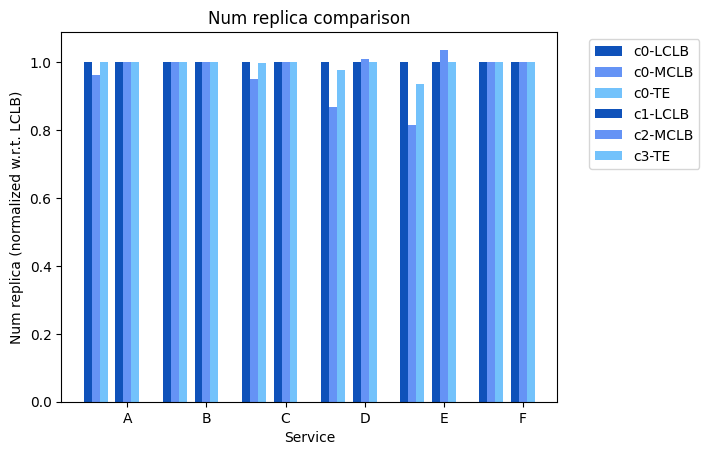

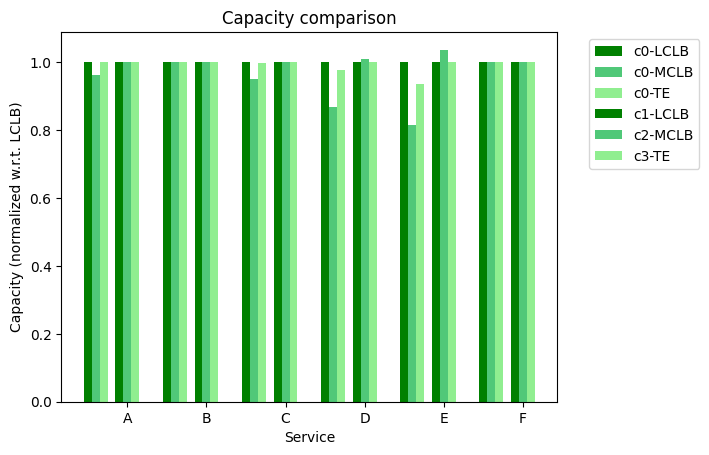

In [55]:
# Sample data for the bar plots

cl = ['#0F52BA', '#6593F5', '#73C2FB']
bar_width = 0.1
x = np.arange(6)
plt.bar(x - 5*bar_width, df_usage[(df_usage["cluster_id"]==0) & (df_usage["routing"]==routing_algorithm[0])]["norm_num_replica"], width=bar_width, color=cl[0], label='c0-LCLB')
plt.bar(x - 4*bar_width, df_usage[(df_usage["cluster_id"]==0) & (df_usage["routing"]==routing_algorithm[1])]["norm_num_replica"], width=bar_width, color=cl[1], label='c0-MCLB')
plt.bar(x - 3*bar_width, df_usage[(df_usage["cluster_id"]==0) & (df_usage["routing"]==routing_algorithm[2])]["norm_num_replica"], width=bar_width, color=cl[2], label='c0-TE')
plt.bar(x - 1*bar_width, df_usage[(df_usage["cluster_id"]==1) & (df_usage["routing"]==routing_algorithm[0])]["norm_num_replica"], width=bar_width, color=cl[0], label='c1-LCLB')
plt.bar(x - 0*bar_width, df_usage[(df_usage["cluster_id"]==1) & (df_usage["routing"]==routing_algorithm[1])]["norm_num_replica"], width=bar_width, color=cl[1], label='c2-MCLB')
plt.bar(x + 1*bar_width, df_usage[(df_usage["cluster_id"]==1) & (df_usage["routing"]==routing_algorithm[2])]["norm_num_replica"], width=bar_width, color=cl[2], label='c3-TE')
plt.xticks(x, svc_list)
plt.xlabel('Service')
plt.ylabel('Num replica (normalized w.r.t. LCLB)')
plt.title('Num replica comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


cl = ['#008000', '#50C878', '#90EE90']
plt.bar(x - 5*bar_width, df_usage[(df_usage["cluster_id"]==0) & (df_usage["routing"]==routing_algorithm[0])]["norm_capacity"], width=bar_width, color=cl[0], label='c0-LCLB')
plt.bar(x - 4*bar_width, df_usage[(df_usage["cluster_id"]==0) & (df_usage["routing"]==routing_algorithm[1])]["norm_capacity"], width=bar_width, color=cl[1], label='c0-MCLB')
plt.bar(x - 3*bar_width, df_usage[(df_usage["cluster_id"]==0) & (df_usage["routing"]==routing_algorithm[2])]["norm_capacity"], width=bar_width, color=cl[2], label='c0-TE')
plt.bar(x - 1*bar_width, df_usage[(df_usage["cluster_id"]==1) & (df_usage["routing"]==routing_algorithm[0])]["norm_capacity"], width=bar_width, color=cl[0],  label='c1-LCLB')
plt.bar(x - 0*bar_width, df_usage[(df_usage["cluster_id"]==1) & (df_usage["routing"]==routing_algorithm[1])]["norm_capacity"], width=bar_width, color=cl[1], label='c2-MCLB')
plt.bar(x + 1*bar_width, df_usage[(df_usage["cluster_id"]==1) & (df_usage["routing"]==routing_algorithm[2])]["norm_capacity"], width=bar_width, color=cl[2], label='c3-TE')
plt.xticks(x, svc_list)
plt.xlabel('Service')
plt.ylabel('Capacity (normalized w.r.t. LCLB)')
plt.title('Capacity comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

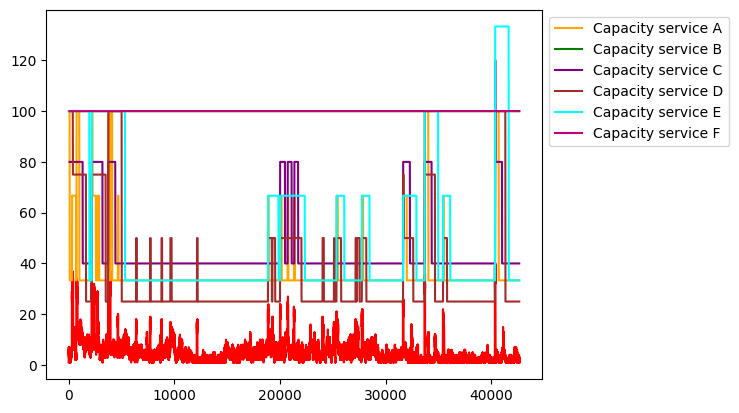

In [56]:
def request_arrival_to_rps(req_arr):
    rps_list = list()
    rps = 0
    window = 0
    for i in range(len(req_arr)):
        rps += 1
        if req_arr[i] >= 1000*window:
            rps_list.append(rps)                    
            rps = 0
            window += 1
    return rps_list

file_ = open("../simulator/log/hotos-6d9c26b9-fixed_autoscaler/three_depth/RoundRobin-LCLB/request_arrival-cluster_0.txt", 'r')
data = file_.readlines()
req_arr = list()
for elem in data:
    req_arr.append(float(elem.strip()))

rps = request_arrival_to_rps(req_arr)
plt.plot(rps, color="red")

marekr_idx = 0
for svc in svc_list:
    temp_df = df[df["cluster_id"]==0]
    temp_df = temp_df[temp_df["routing"]=="RoundRobin-LCLB"]
    temp_df = temp_df[temp_df["service"]==svc]
    ts = [x/1000 for x in temp_df["timestamp"]]
    plt.plot(ts,temp_df["capacity"].to_list(),  markersize=5, color=color_list[marekr_idx], label="Capacity service " + svc)
    marekr_idx += 1
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
# plt.savefig("temp.pdf", dpi=100, bbox_inches='tight')
plt.show()


In [ ]:
# def plot_and_save_resource_provisioning(f_):
#     def get_ylim(req_arr_0, req_arr_1, capa_0, capa_1):
#         def get_max_rps_ylim(reqarr):
#             cur = 1000 # 1000ms, 1sec
#             cnt_list = list()
#             cnt_list.append(0)
#             idx = 0
#             for arr in reqarr:
#                 if arr > cur: # Every 1000ms
#                     cur += 1000
#                     idx += 1
#                     cnt_list.append(0)
#                 cnt_list[idx] += 1
#             max_rps = max(cnt_list) # Max number of request/sec which will be the max y value in the plot
#             return max_rps
#         max_rps_cluster_0 = get_max_rps_ylim(req_arr_0)
#         max_rps_cluster_1 = get_max_rps_ylim(req_arr_1)
#         max_rps = max(max_rps_cluster_0, max_rps_cluster_1)
            
#         cluster_0_capa_trend = dict()
#         cluster_1_capa_trend = dict()
#         for service in capa_0:
#             cluster_0_capa_trend[service] = [ x[1] for x in capa_0[service]]
#             print("cluster_0_capa_trend,{}".format(service.name))
#             print(cluster_0_capa_trend[service])
#         for service in capa_1:
#             cluster_1_capa_trend[service] = [ x[1] for x in capa_1[service]]
#             print("cluster_1_capa_trend[service]: ", cluster_1_capa_trend[service])
#         max_capa_cluster_0 = 0
#         for service in cluster_0_capa_trend:
#             if len(cluster_0_capa_trend[service]) > 0:
#                 max_capa_cluster_0 = max(max_capa_cluster_0, max(cluster_0_capa_trend[service]))
#         max_capa_cluster_1 = 0
#         for service in cluster_1_capa_trend:
#             if len(cluster_1_capa_trend[service]) > 0:
#                 max_capa_cluster_1 = max(max_capa_cluster_1, max(cluster_1_capa_trend[service]))
#         max_capa = max(max_capa_cluster_0, max_capa_cluster_1)
#         ymax = max(max_rps, max_capa) + 10
#         return ymax
        
#     ylim = get_ylim(self.request_arr_0, self.request_arr_1, self.cluster0_capacity, self.cluster1_capacity)
#     title_cluster_0 = "cluster_0-" + self.get_experiment_title()
#     title_cluster_1 = "cluster_1-" + self.get_experiment_title()
#     path_to_autoscaler_cluster_0 = self.get_output_dir()+"/resource_provisioing_trend-cluster_0.pdf"
#     path_to_autoscaler_cluster_1 = self.get_output_dir()+"/resource_provisioing_trend-cluster_1.pdf"
#     utils.plot_workload_histogram_with_autoscaling(self.request_arr_0, self.cluster0_capacity, title_cluster_0, ylim, path_to_autoscaler_cluster_0)
#     utils.plot_workload_histogram_with_autoscaling(self.request_arr_1, self.cluster1_capacity, title_cluster_1, ylim, path_to_autoscaler_cluster_1)
    
# common_path="../simulator/log/hotos-6d9c26b9-fixed_autoscaler/three_depth/"
# for routing in routing_algorithm:
#     f_ = common_path + routing + "/resource_provisioing_log.csv"
#     plot_and_save_resource_provisioning(f_)